k-means로 계속하여 사진을 입력받고 분류할때, 저장공간을 많이 차지하는 문제점이 발생할 수 있다.<br>
이때 차원축소를 이용하면 저장공간을 줄일 수 있지 않을까? <br>
여기서 차원(dimension)이란 1차원, 2차원이 아닌 특성 수를 말한다. 예) 과일 사진의 경우 10,000개의 픽셀을 가지고 있고 이 10,000개의 픽셀이 특성, 차원이다.

### 차원 축소 (dimensionality reduction)
: 지도학습에서 특성이 너무 많으면 과대적합이 일어난다는 것을 배웠다
- 차원 축소는 데이터를 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습모델의 성능을 향상 시킬 수 있다.
- 다시 원본 차원으로 손실을 최대한 줄이고 복원 가능
- 저차원에서는 일어나지 않는 형상들이 고차원에서 데이터를 분석하거나 다룰대 생겨나는 현상 (차원의 저주)
- 고차원으로 올라갈 수록 공간의 크기가 많이 커진다. 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아 지기 때문에 발생.
- ==> 데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고 과적합을 방지하기 위해 데이터의 차원을 축소한다.
- 차원축소의 대표적인 예: 시각화를 위해 데이터를 2차원으로 변경 (평면)<br><br>
<언제 사용하는가>
* 시각화
* 노이즈 감소
* 정보를 적은 차원에 공간에 저장하므로 메모리 저장
* 용량이 적으므로 성능도 좋아진다
#### 주성분 분석 (Principal Component Analysis - PCA) : 대표적 차원 축소 알고리즘
: 데이터에 있는 분산이 큰 방향을 찾는 것.
- 분산 : 데이터가 널리 퍼져있는 정도
- 분산이 큰 방향 : 데이터의 분포를 잘 표현하는 어떤 벡터/방향 = 주성분
- 첫번째 주성분을 찾은 다음, 이 벡터에 수직이고 분산이 가장 큰 다음 방향 (두번째 주성분)을 찾는다...
- 주성분은 원본 특성 개수만큼 찾을 수 있다. (원본의 특성 개수와 샘플 개수 중 작은 값만큼, 일반적으로 비지도 학습은 대량의 데이터이므로 특성 개수만큼 찾을 수 있다고 봄)

- 주성분 분석은 특성들이 통계적으로 상관관계없이 ... 회전(?)


In [1]:
import numpy as np
# .npy 파일은 이미 이전에 다운받았다
fruits = np.load('../data/fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA가 찾은 주 성분 : components_

In [3]:
print(pca.components_.shape)

(50, 10000)


==> n_components = 50으로 지정했으므로 첫번째 차원이 50, 두번째 차원은 항상 원본 데이터의 특성개수 (10,000)

In [8]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):  # (샘플개수, 너비, 높이)의 3차원 배열을 입력 받아 가로로 10개씩 이미지 출력
    n = len(arr)   # n은 샘플 개수
    #한 줄에 10개씩 이미지 출력.
    rows = int(np.ceil(n/10))
    #행이 1개면 열의 개수는 샘플 개수. 아니면 10개
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)  # 샘플 개수에 따라 figsize지정 (ratio에 비례, 기본값 : 1)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:   # n개 까지만 그린다
                axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
            axs[i,j].axis('off')
    plt.show()

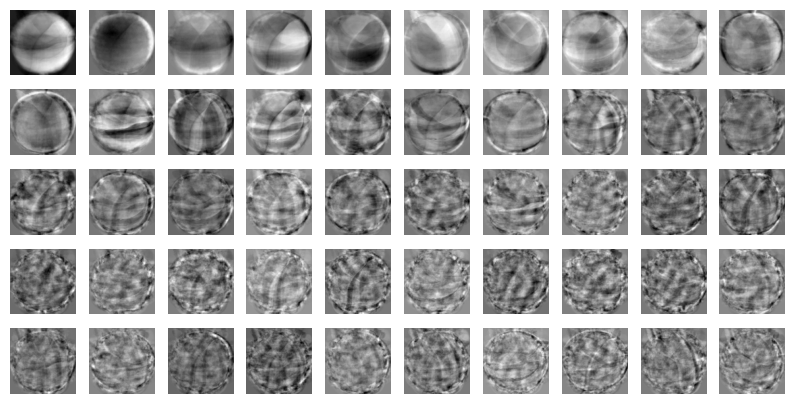

In [9]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [10]:
print(fruits_2d.shape)
# 10,000개의 특성(픽셀)을 가진 300개의 이미지 

(300, 10000)


In [11]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 50개 주성분을 찾은 PCA모델을 이용, 50개의 특성을 가진 300개 이미지

(300, 50)


### 원본 데이터 재구성

In [13]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


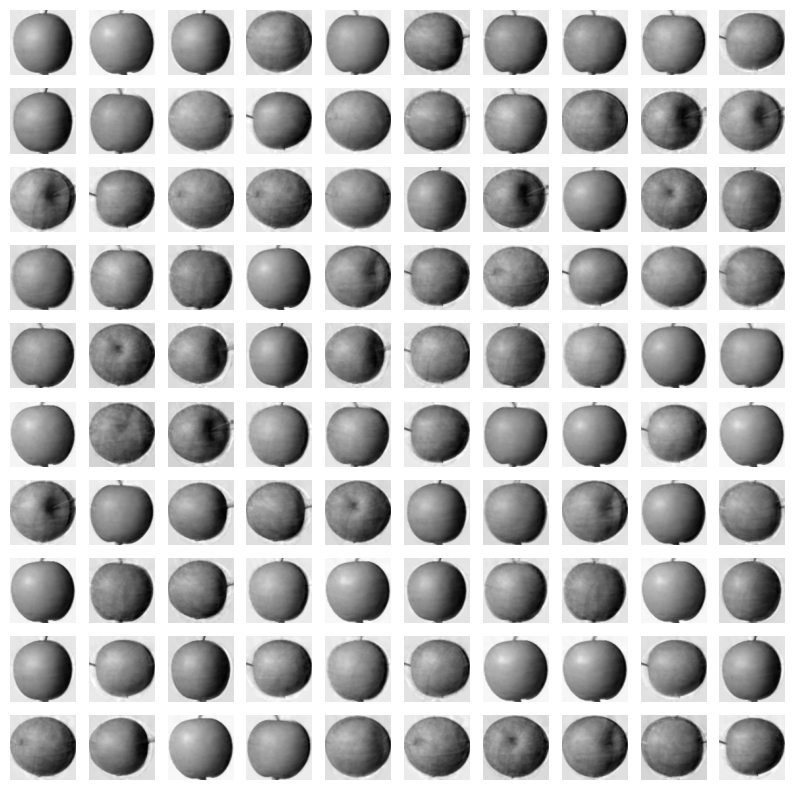

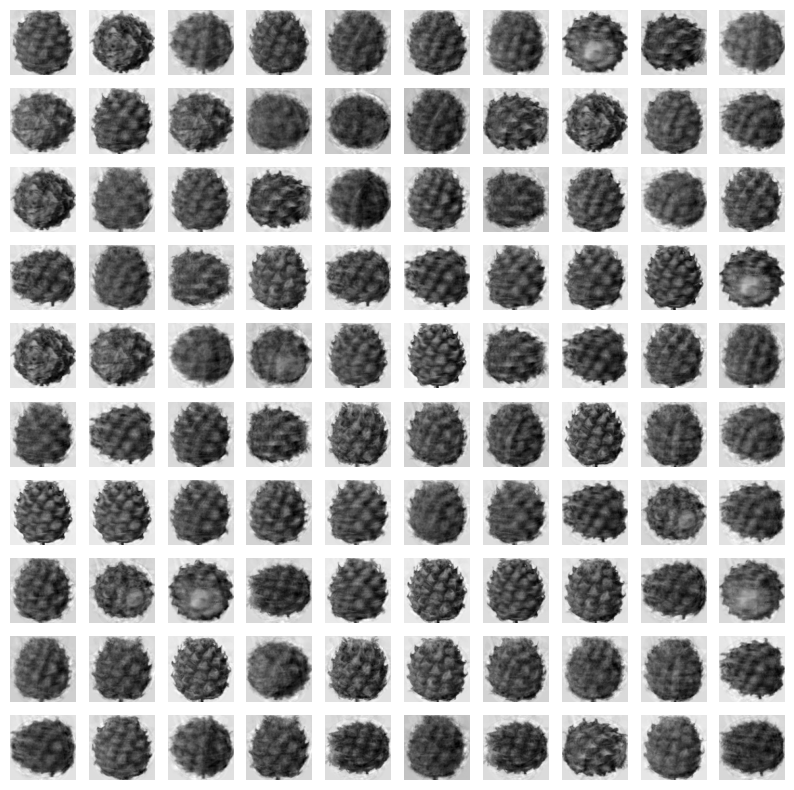

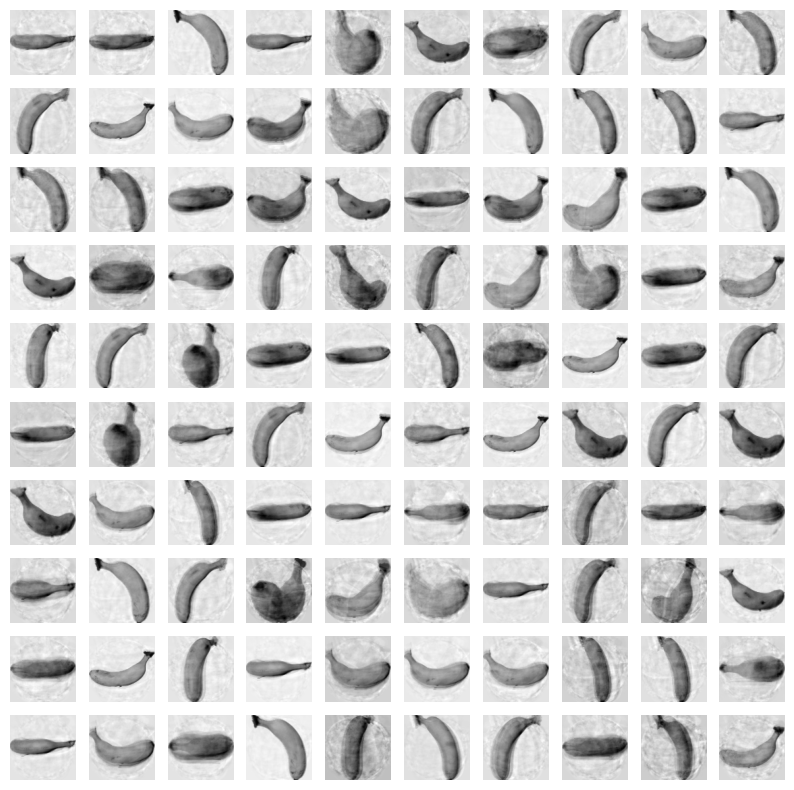

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:  # 과일별
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

==> 거의 모든 과일들이 잘 복원되었다! (50개의 특성을 다시 10,000개의 특성으로 재구성)

설명된 분산 (explained variance) : explined_variance_ratio_
- 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9215404349325986


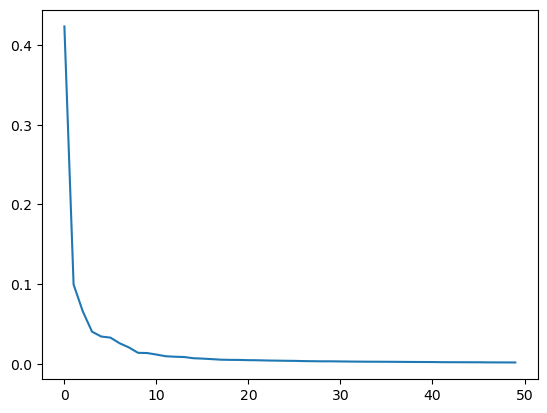

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

==> 처음 10개의 주성분이 대부분의 분산을 표현함을 알 수 있다. 

### 다른 알고리즘과 PCA사용하기
: 원본 데이터와 축소된 데이터르 지도학습에 대입해보고 어떤 차이가 있는지 알아보자

(1) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
# 지도학습모델에는 타겟값이 필요. 사과 : 0, 파인애플 : 1, 바나나 :2
target = np.array([0]*100 +[1]*100 + [2]*100)

In [19]:
# 원본 데이터를 사용
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.7886910915374756


In [20]:
# PCA로 축소한 fruits_pca사용
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04527864456176758


*n_components 매개변수에 주성분 개수 자체를 지정할 수 있을 뿐만 아니라 설명된 비율을 입력할 수도 있다

In [21]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)  # 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다!

2


In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [24]:
# 교차검증의 결과는 어떨까?
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9933333333333334
0.05193901062011719


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(2) K-평균 알고리즘

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))
# [110,  99,  91] ==> 원본 데이터를 이용했을 때와 비슷

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


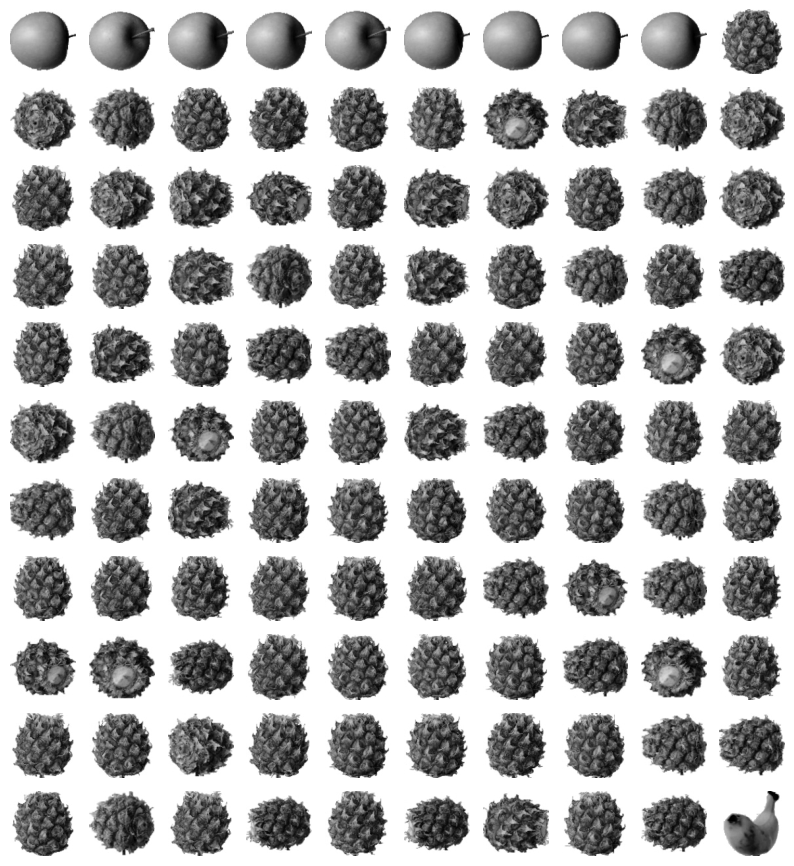

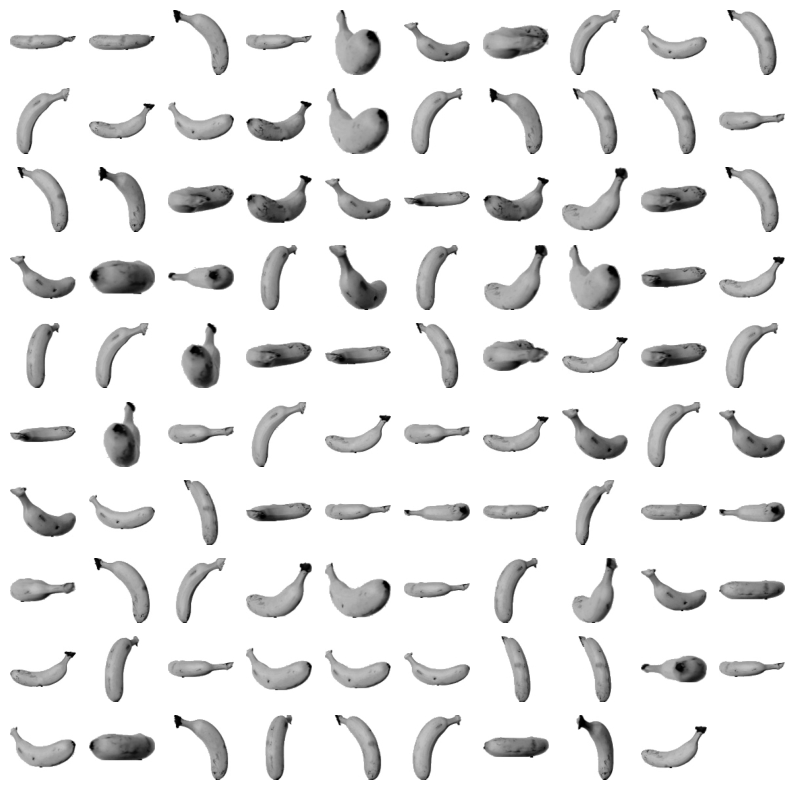

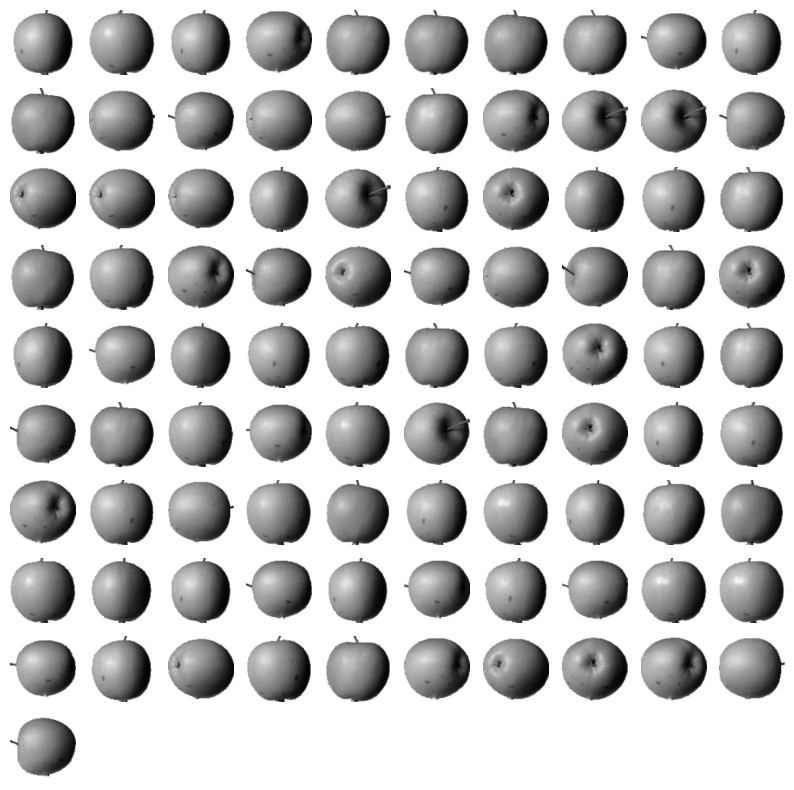

In [26]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')

* 훈련 데이터의 차원을 줄이면 얻을 수 있는 또 하나의 장점 : 시각화
    - 3개 이하의 차원으로 줄이면 화면ㅇ ㅔ출력하기 좋다
    - fruits_pca는 2개의 특성을 가지고 있기 때문에 2차원으로 표현할 수 있다

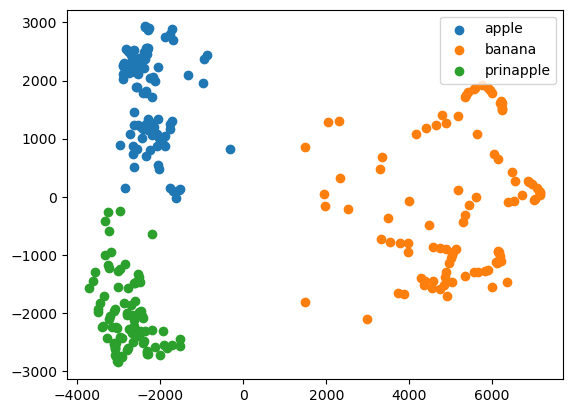

In [27]:
# km.labels_로 산점도를 그려보자
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'prinapple'])
plt.show()